<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/integral_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La función pulso unitario es una función definida por partes como:

$
f(x) =
\begin{cases}
1, & \text{si } -1 \leq x \leq 1 \\\\
0, & \text{en otro caso}
\end{cases}
$


Esta función es **par**, **acotada** y presenta discontinuidades en $ x = -1$ y $x = 1$. Es un ejemplo clásico de función que puede representarse mediante una integral de Fourier, ya que es absolutamente integrable sobre $ \mathbb{R}$.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

a) Grafique esta función.

Definimos las variables

In [50]:
#definimos las variables simbolicamnete
x, v, w = sp.symbols('x v w', real=True)

In [51]:
# Definición simbólica de la función pulso unitario
f = sp.Piecewise((1, sp.And(x >= -1, x <= 1)), (0, True))
f


Piecewise((1, (x >= -1) & (x <= 1)), (0, True))

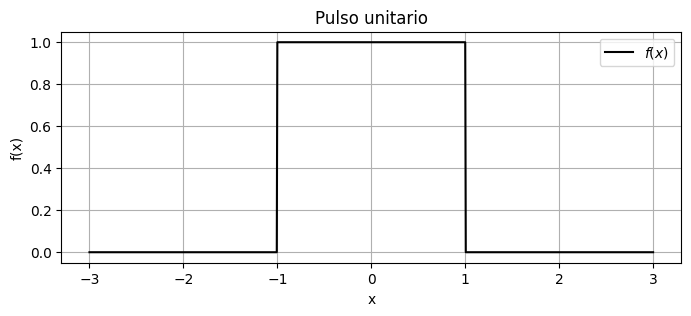

In [52]:
#graficamos el pulso unitario
def plot_pulse():
    xx = np.linspace(-3, 3, 1000)
    ff = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    plt.figure(figsize=(8, 3))
    plt.plot(xx, ff, label=r'$f(x)$', color='black')
    plt.title('Pulso unitario')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_pulse()

b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare

In [53]:
# Cálculo simbólico de A(w) (sólo se integra de -1 a 1 porque fuera de ahí f = 0)
A_w = (1/sp.pi) * sp.integrate(sp.cos(w * v), (v, -1, 1))
A_w = sp.simplify(A_w)
display(sp.Eq(sp.Function('A')(w), A_w))

Eq(A(w), Piecewise((2*sin(w)/(pi*w), (w > 0) | (w < 0)), (2/pi, True)))

Damos la representacion simbolica de la integral de fourier

<lambdifygenerated-12001>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<ipython-input-54-702037441>:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand(w_vals), w_vals)
<lambdifygenerated-12002>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-12003>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-12004>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi

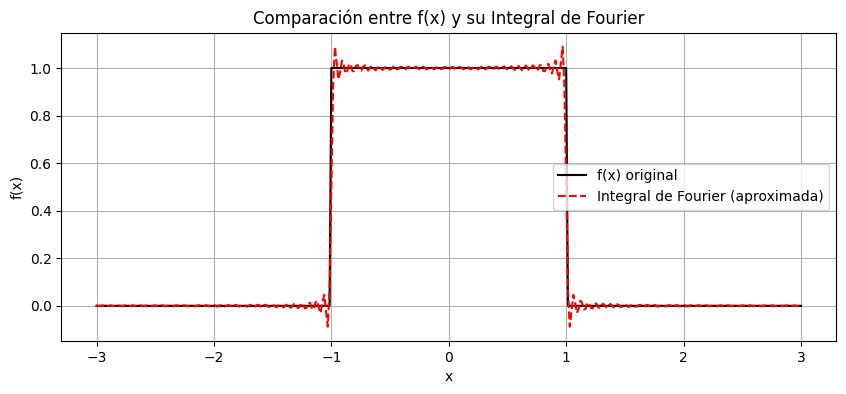

In [54]:
# Aproximación numérica de la integral impropia con trapz
def f_fourier_num(x_val, a_max=100):
    integrand = sp.lambdify(w, A_simpl * sp.cos(w * x_val), 'numpy')
    w_vals = np.linspace(0, a_max, 3000)
    return np.trapz(integrand(w_vals), w_vals)

# Gráfica comparativa
def plot_fourier_vs_original():
    xx = np.linspace(-3, 3, 400)
    f_original = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])
    f_aprox = [f_fourier_num(xi) for xi in xx]

    plt.figure(figsize=(10, 4))
    plt.plot(xx, f_original, label='f(x) original', color='black')
    plt.plot(xx, f_aprox, '--', label='Integral de Fourier (aproximada)', color='red')
    plt.title('Comparación entre f(x) y su Integral de Fourier')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_fourier_vs_original()


c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b)

<lambdifygenerated-12401>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(3.0*w)
<ipython-input-55-351180192>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand(wi), wi)
<lambdifygenerated-12402>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.98496240601504*w)
<lambdifygenerated-12403>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi], default=nan)*cos(2.96992481203007*w)
<lambdifygenerated-12404>:2: RuntimeWarning: invalid value encountered in divide
  return select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)/(pi*w),2/pi

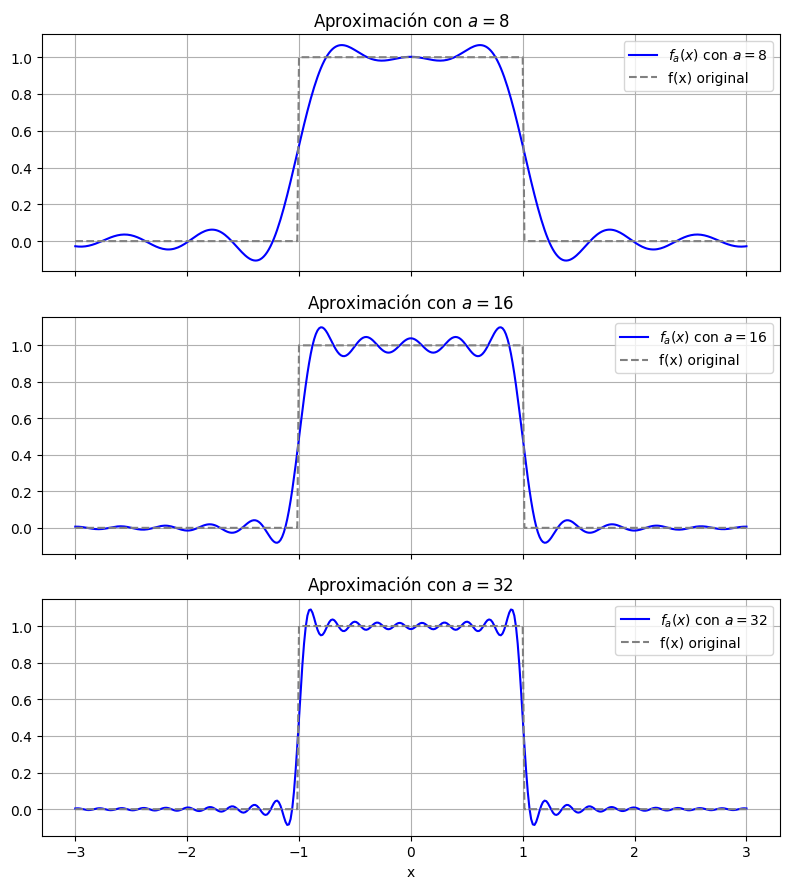

In [55]:


def generar_aproximaciones(a):
    def f_aprox(xval):
        expr = A_w * sp.cos(w * xval)
        integrand = sp.lambdify(w, expr, modules=["numpy"])
        wi = np.linspace(0, a, 2000)
        return np.trapz(integrand(wi), wi)

    xx = np.linspace(-3, 3, 400)
    yy_aprox = [f_aprox(xi) for xi in xx]
    return xx, yy_aprox

# Valores de a
a_values = [8, 16, 32]
xx = np.linspace(-3, 3, 400)
yy_original = np.piecewise(xx, [(-1 <= xx) & (xx <= 1)], [1, 0])

# Crear figura con 3 subplots verticales
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 9), sharex=True)

for i, a in enumerate(a_values):
    x_vals, y_vals = generar_aproximaciones(a)
    axes[i].plot(x_vals, y_vals, label=fr'$f_a(x)$ con $a={a}$', color='blue')
    axes[i].plot(x_vals, yy_original, '--', label='f(x) original', color='gray')
    axes[i].set_title(fr'Aproximación con $a = {a}$')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

axes[2].set_xlabel('x')
plt.tight_layout()
plt.show()

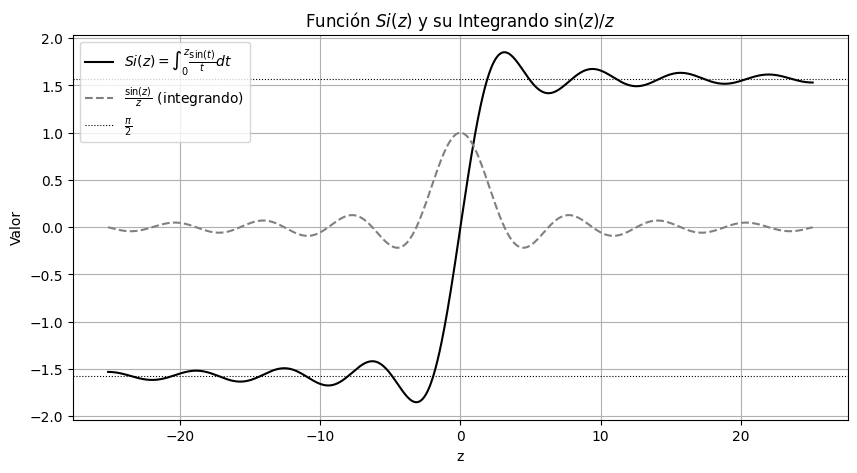

In [57]:
# Valores de z
z_vals = np.linspace(-8 * np.pi, 8 * np.pi, 1000)

# Definimos el integrando sinc(z)
def sinc(z):
    return np.where(z == 0, 1, np.sin(z) / z)

# Definimos la función Si(z) como integral definida
def si(z_array):
    return np.array([quad(lambda t: np.sin(t) / t if t != 0 else 1, 0, z)[0] for z in z_array])

# Evaluamos las funciones
integrando_vals = sinc(z_vals)
si_vals = si(z_vals)

# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(z_vals, si_vals, label=r'$Si(z) = \int_0^z \frac{\sin(t)}{t} dt$', color='black')
plt.plot(z_vals, integrando_vals, linestyle='--', label=r'$\frac{\sin(z)}{z}$ (integrando)', color='gray')
plt.axhline(np.pi / 2, color='black', linestyle=':', linewidth=0.8, label=r'$\frac{\pi}{2}$')
plt.axhline(-np.pi / 2, color='black', linestyle=':', linewidth=0.8)
plt.title('Función $Si(z)$ y su Integrando $\sin(z)/z$')
plt.xlabel('z')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()